
# **Detección de outliers de forma gráfica**

# Outliers en 1 Dimension

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

Analizamos una sola variable, por ejemplo “edad” y vemos donde se concentran la mayoría de muestras y los posibles valores “extremos”

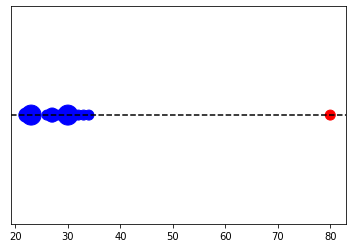

In [ ]:
edades = np.array([22,22,23,23,23,23,26,27,27,28,30,30,30,30,31,32,33,34,80])
edad_unique, counts = np.unique(edades, return_counts=True)
sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

In [ ]:
edad_unique

array([22, 23, 26, 27, 28, 30, 31, 32, 33, 34, 80])

La mayoría de valores se concentran en azul (mayoría de edades, entre 20 y 35 años)

En rojo los outliers (en este caso una muestra aislada con valor 80)

# Outliers en 2 Dimensiones

En este ejemplo tenemos 2 variables: edad e ingresos para lo que haremos una gráfica en 2D. 

Además, usaremos una fórmula para trazar un círculo que será muy útil ya que delimitará los valores outliers: Los valores que superen el valor de la “media más 2 desvíos estándar” (en nuestro caso el área del círculo) quedarán en rojo

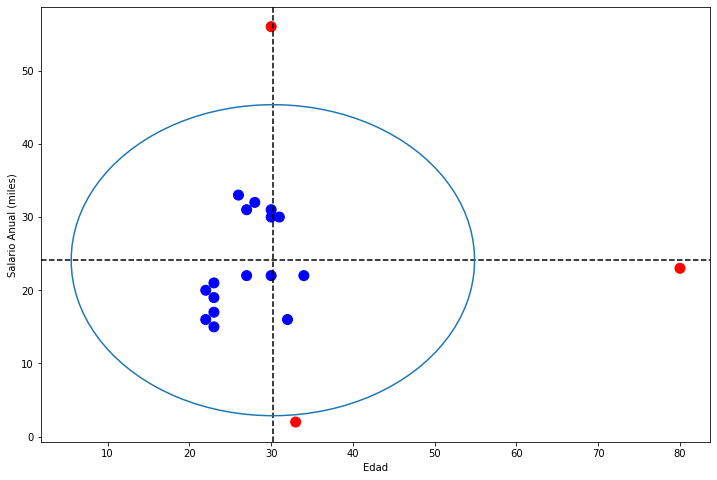

In [ ]:
salario_anual_miles = np.array([16,20,15,21,19,17,33,22,31,32,56,30,22,31,30,16,2,22,23])
media = (salario_anual_miles).mean()
std_x = (salario_anual_miles).std()*2
media_y = (edades).mean()
std_y = (edades).std()*2

colors = ['blue']*len(salario_anual_miles)
for index, x in enumerate(salario_anual_miles):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(edades):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'

plt.figure(figsize=(12,8))


plt.scatter(edades, salario_anual_miles, s=100, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')

v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )


plt.xlabel('Edad')
plt.ylabel('Salario Anual (miles)')
plt.show()

# Outliers en 3D

Para "complicarlo" un poquito más vamos a añadir una nueva dimensión a nuestro dataset. Por ejemplo, la dimensión de “compras mensuales”.



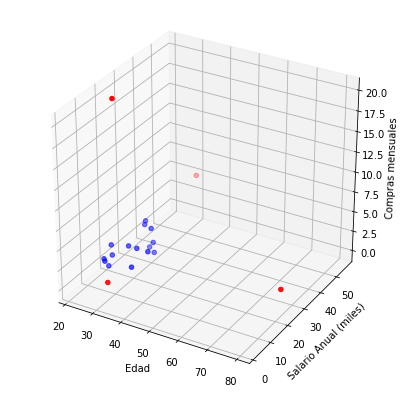

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

compras_mes = np.array([1,2,1,20,1,0,3,2,3,0,5,3,2,1,0,1,2,2,2])
media_z = (compras_mes).mean()
std_z = (compras_mes).std()*2

for index, x in enumerate(compras_mes):
    if abs(x-media_z) > std_z:
        colors[index] = 'red'

ax.scatter(edades, salario_anual_miles, compras_mes, s=20, c=colors)
plt.xlabel('Edad')
plt.ylabel('Salario Anual (miles)')
ax.set_zlabel('Compras mensuales')

plt.show()

# Outliers usando Boxplots

Una gráfica bastante interesante de conocer es la de los Boxplots, muy utilizados en el mundo financiero.

{'boxes': [<matplotlib.lines.Line2D at 0x7f98b0ef04d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f98b0ed74d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f98b0ed3510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f98b0ed7f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f98b0ef0a10>,
  <matplotlib.lines.Line2D at 0x7f98b0ef0f50>]}

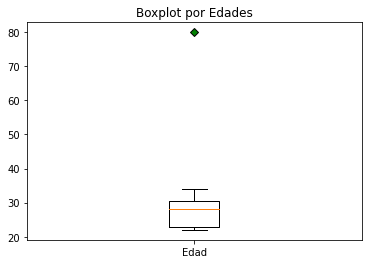

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por Edades')
ax.boxplot(edades, flierprops=green_diamond, labels=["Edad"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f98af534810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f98af4b9810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f98af4c0850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f98af4c0310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f98af534d50>,
  <matplotlib.lines.Line2D at 0x7f98af4b92d0>]}

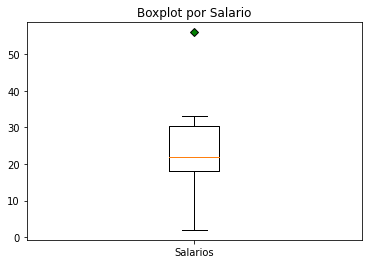

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por Salario')
ax.boxplot(salario_anual_miles, flierprops=green_diamond, labels=["Salarios"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f98af4a4150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f98af4aa150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f98af4b1190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f98af4aac10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f98af4a4690>,
  <matplotlib.lines.Line2D at 0x7f98af4a4bd0>]}

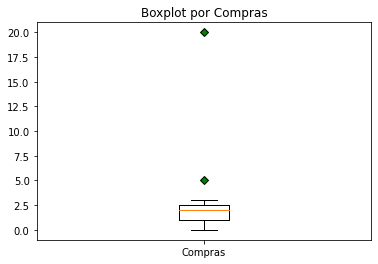

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por Compras')
ax.boxplot(compras_mes, flierprops=green_diamond, labels=["Compras"])

# Como afecta ouliers

Usando seaborn vemos la línea de tendencia de la misma distribución con y sin outliers:

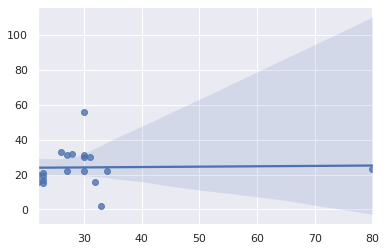

In [ ]:
import seaborn as sns

#CON OUTLIERS

sns.set(color_codes=True)
sns.regplot(x=edades, y=salario_anual_miles)

La línea de tendencia se mantiene plana sobre todo por el outlier de la edad

/anaconda/envs/python36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


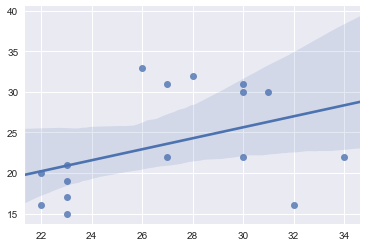

In [ ]:
# SIN OUTLIERS

edades_fix=[]
salario_anual_miles_fix=[]

for index, x in enumerate(salario_anual_miles):
    y= edades[index]
    if abs(x-media) > std_x or abs(y-media_y) > std_y:
        pass
    else:
        edades_fix.append(y)
        salario_anual_miles_fix.append(x)
        
sns.regplot(x=np.array(edades_fix), y=np.array(salario_anual_miles_fix))

 Al quitar los outliers la tendencia empieza a tener pendiente

# Outliers usando Libreria Pyod

Esto es muy interesante porque la realidad es que los modelos en los que trabajamos tienen muchas dimensiones con lo que es muy difícil visualizar los outliers

Con esta librería se pueden reducir las dimensiones, agrupar para analizar cercanías entre muestras, como KNN, PCA, redes neuronales

In [ ]:
!pip install pyod

     |████████████████████████████████| 102kB 4.1MB/s 
  Created wheel for pyod: filename=pyod-0.8.7-cp37-none-any.whl size=115979 sha256=6c7c328f9442f895461d630f140ef98a01bd61d40d55a8b178379b4ca80e1011
  Stored in directory: /root/.cache/pip/wheels/b7/8a/c9/5fe3f32692ad445fe573cf5b953d7a0d55dc1f7c8e229ebda0
Successfully built pyod


In [ ]:
from pyod.models.knn import KNN
from pyod.models.pca import PCA
import pandas as pd

In [ ]:
df = pd.DataFrame(data={'edad':edades,'salario':salario_anual_miles, 'compras':compras_mes})

In [ ]:
clf = KNN(contamination=0.18)
#clf = PCA(contamination=0.17)
clf.fit(df)

X=df
clf.fit(X)
scores_pred = clf.decision_function(X)
y_pred = clf.predict(X)

In [ ]:
scores_pred

array([ 4.12310563,  5.19615242,  5.19615242, 19.33907961,  4.        ,
        3.74165739,  5.        ,  6.70820393,  3.60555128,  3.74165739,
       25.3179778 ,  4.12310563,  7.68114575,  3.60555128,  5.09901951,
        9.05538514, 18.13835715,  8.77496439, 50.009999  ])

Esto está muy bien porque nos puede sacar una predicción de los outliers

práctico para casos donde hay muchos datos y dimensiones

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
X

,edad,salario,compras
0,22,16,1
1,22,20,2
2,23,15,1
3,23,21,20
4,23,19,1
5,23,17,0
6,26,33,3
7,27,22,2
8,27,31,3
9,28,32,0


Valores finales predecidos

In [ ]:
df[y_pred == 1]

,edad,salario,compras
3,23,21,20
10,30,56,5
16,33,2,2
18,80,23,2


Y a practicar, podéis ver este tipo de cosas con vuestros datos, seguro que lo encontráis